In [10]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [2]:
mnist_dataset,mnist_info = tfds.load(name = 'mnist',as_supervised=True,with_info = True)
mnist_train,mnist_test = mnist_dataset['train'],mnist_dataset['test']
num_validation_samples = 0.1*mnist_info.splits['train'].num_examples
num_validation_samples = tf.cast(num_validation_samples,tf.int64)

num_test_samples = tf.cast(mnist_info.splits['test'].num_examples,tf.int64)



#scaling:
def scale(image , label):
    image = tf.cast(image,tf.float32)
    image /= 255.0
    return image,label
scaled_train_and_validation_data = mnist_train.map(scale)

test_data = mnist_test.map(scale)

#shuffling:
buffer_size = 10000
shuffled_train_and_validation_data = scaled_train_and_validation_data.shuffle(buffer_size)

validation_data = shuffled_train_and_validation_data.take(num_validation_samples)
train_data = shuffled_train_and_validation_data.skip(num_validation_samples)


#batching:
batch_size = 100

train_data = train_data.batch(100)
validation_data = validation_data.batch(num_validation_samples)
test_data = test_data.batch(100)


validation_inputs,validation_target = next(iter(validation_data))
train_inputs,train_target = next(iter(train_data))
test_inputs,test_target = next(iter(test_data))


modeling

In [3]:
input_size = 784
output_size = 10
hidden_layer_size = 100


In [4]:
#num of nodes in model: 784->50->50->10

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
    tf.keras.layers.Dense(output_size,activation='softmax')
])

In [5]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [6]:
num_epochs = 5

model.fit(train_data,epochs = num_epochs,validation_data = (validation_inputs,validation_target),verbose=2)

Epoch 1/5
540/540 - 3s - loss: 0.3345 - accuracy: 0.9052 - val_loss: 0.1702 - val_accuracy: 0.9508 - 3s/epoch - 5ms/step
Epoch 2/5
540/540 - 2s - loss: 0.1419 - accuracy: 0.9584 - val_loss: 0.1065 - val_accuracy: 0.9660 - 2s/epoch - 4ms/step
Epoch 3/5
540/540 - 2s - loss: 0.1004 - accuracy: 0.9703 - val_loss: 0.0890 - val_accuracy: 0.9720 - 2s/epoch - 3ms/step
Epoch 4/5
540/540 - 2s - loss: 0.0752 - accuracy: 0.9768 - val_loss: 0.0714 - val_accuracy: 0.9787 - 2s/epoch - 3ms/step
Epoch 5/5
540/540 - 2s - loss: 0.0601 - accuracy: 0.9815 - val_loss: 0.0543 - val_accuracy: 0.9817 - 2s/epoch - 3ms/step


In [109]:
test_loss,test_accuracy = model.evaluate(test_data,verbose=False)
print(f'Test\nLoss:{test_loss:0.3f}\nAccuracy:{test_accuracy:0.3f}')

Test
Loss:0.083
Accuracy:0.974


In [121]:
model.save('mnist_model')

INFO:tensorflow:Assets written to: mnist_model\assets


INFO:tensorflow:Assets written to: mnist_model\assets


In [53]:
image_list = list(mnist_test.map(scale))

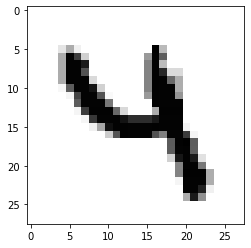

Index: 8773
Label: 4
Pridicted: 4




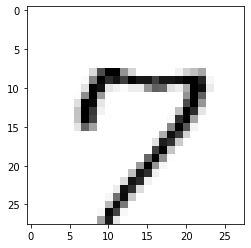

Index: 5233
Label: 7
Pridicted: 7




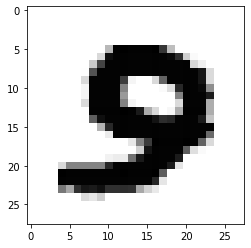

Index: 9508
Label: 9
Pridicted: 9




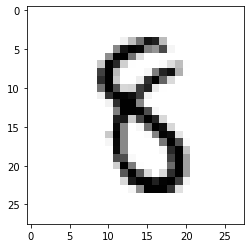

Index: 5794
Label: 8
Pridicted: 8




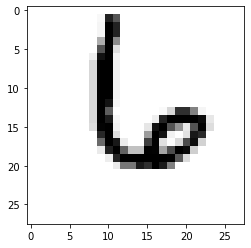

Index: 6246
Label: 6
Pridicted: 6




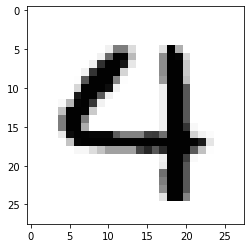

Index: 1419
Label: 4
Pridicted: 4




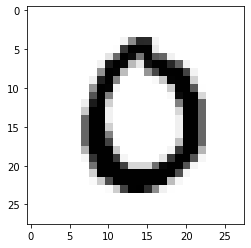

Index: 1991
Label: 0
Pridicted: 0




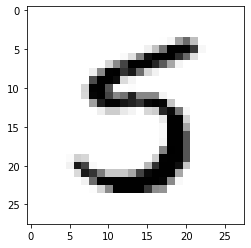

Index: 5211
Label: 5
Pridicted: 5




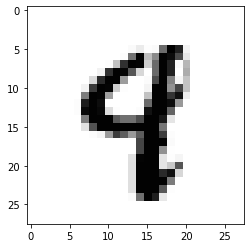

Index: 1607
Label: 9
Pridicted: 9




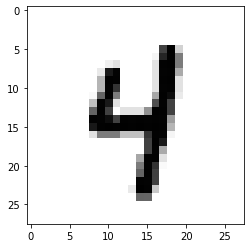

Index: 9287
Label: 4
Pridicted: 4




In [ ]:
num  = 10
for i in np.random.randint(0,num_test_samples,num):
    plt.imshow(image_list[i][0],cmap='Greys')
    plt.show()
    print(f'Index: {i}')
    print(f'Label: {image_list[i][1].numpy()}')
    result = model.predict(image_list[i][0],verbose=False)
    print(f'Pridicted: {result.argmax()}')
    print('\n')